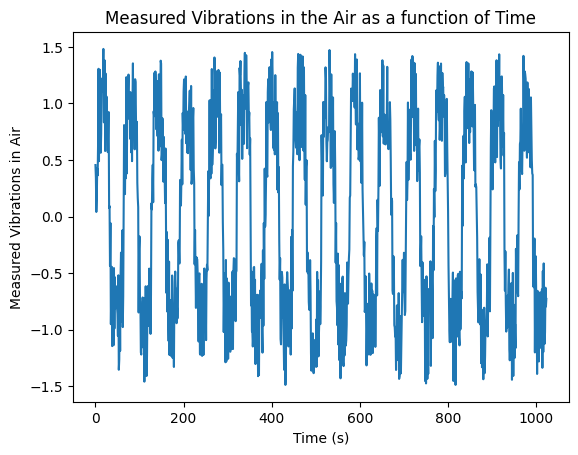

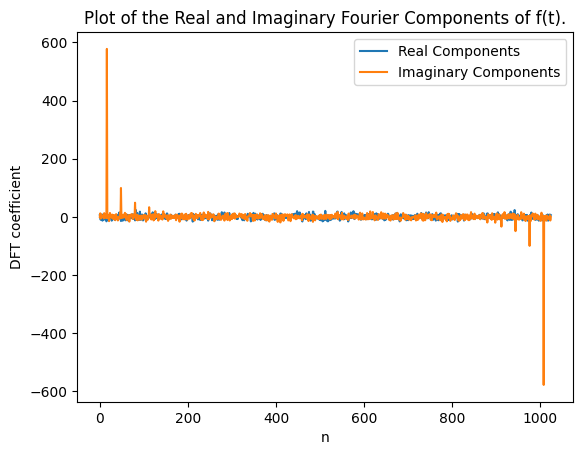

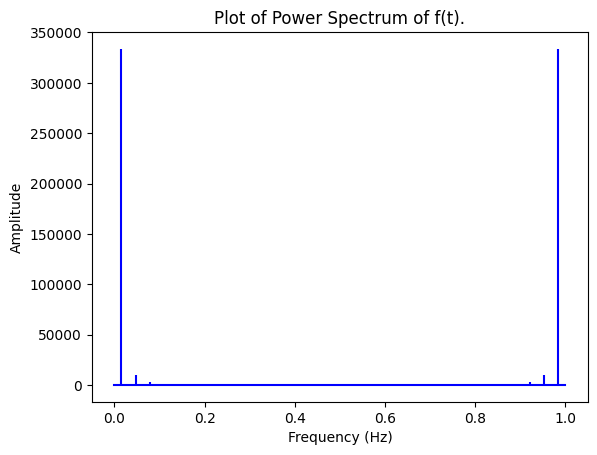

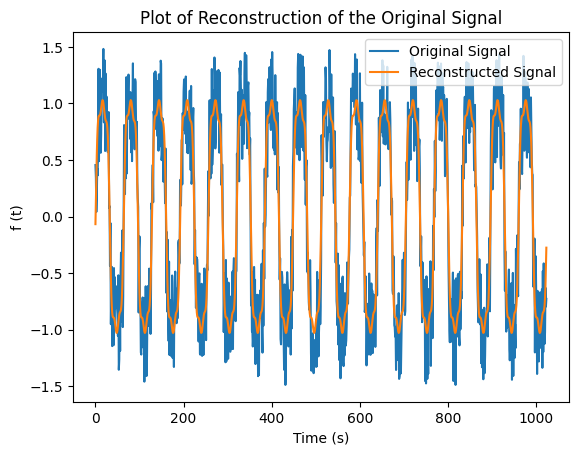

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.fft import fft, ifft

#this is opening the data file, making a list, and getting rid of any blank input
pitch_file = open("pitch.txt","r")
data = pitch_file.read()
data_list = data.split("\n")
data_list.remove('')

#this function undergoes the "signal reconstruction" process. Using Eq (26) from lab manual
def reconstruction(Re_list, Im_list, m, n, time_sampling):
    threshold = 50 #this threshold value is used to "denoise" the signal
    signal = []
    for i in m:
        r = 0
        for j in n:
            if (Re_list[j]**2 + Im_list[j]**2)**(1/2) < threshold: #if the magnitude is less then threshold, r = 0
                pass
            else: #else, do the normal calculation
                r = r + (1/N*(Re_list[j] * math.cos((2*math.pi*j*i)/N) + Im_list[j] * math.sin((2*math.pi*j*i)/N))) #Eq (26) summation
        signal.append(r)
    return(signal)

#setting parameters
N = len(data_list) #N amount of data points
h = 1 #time between each data point
n = np.arange(0,N+1,1)
m = np.arange(0,N,1)
tau = N * h
time_sampling = np.arange(0,N,1)
Re_list = []
Im_list = []

#this plots the original signal from the data file
x = m
y = np.float_(data_list)
plt.figure()
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Measured Vibrations in Air")
plt.title ("Measured Vibrations in the Air as a function of Time")
plt.show()

#this nested loop is creating a list of all the Real and Imaginary components. Using Eq (24) and (25) from lab manual.
for i in n: 
    sum_r = 0
    sum_i = 0
    for j in m:
        Fn =  y[j]*math.cos((2*math.pi*j*i)/N) #Eq (24) summation
        sum_r = sum_r + Fn 
        Fn = y[j]*math.sin((2*math.pi*j*i)/N) #Eq (25) summation
        sum_i = sum_i + Fn
    Re_list.append(sum_r)
    Im_list.append(sum_i)

#using the reconstruction function above, we reconstruct the signal.
r = reconstruction(Re_list, Im_list, m, n, m)

#this plots Real Components vs. n and Imaginary Components vs. n
plt.figure()
plt.plot(n, Re_list)
plt.plot(n, Im_list)
plt.xlabel("n")
plt.ylabel("DFT coefficient")
plt.legend(['Real Components','Imaginary Components'])
plt.title("Plot of the Real and Imaginary Fourier Components of f(t).")
plt.show()

#this plots Power Spectrum of signal
plt.figure()
plt.stem(n/tau, np.asarray(Re_list)**2 + np.asarray(Im_list)**2,'b-', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title ("Plot of Power Spectrum of f(t).")

#this plots the original signal and the reconstructed signal
plt.figure()
plt.plot(m, y[time_sampling])
plt.plot(m, r)
plt.xlabel('Time (s)')
plt.ylabel('f (t)')
plt.title ("Plot of Reconstruction of the Original Signal")
plt.legend(['Original Signal','Reconstructed Signal'],loc='upper right')
plt.show()
